In [1]:
import ROOT
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np

In [2]:
import sys
sys.path.append('..')  # go up one folder so Python can see plotting_utils.py
import plotting_utils

In [3]:
#Load the ROOT dictionaries
ROOT_DICT_PATH = "/Users/sbfoster/Projects/lyso2025/mu-app/mu-data-products/install/lib/libdata_products.dylib" #Change to match system path

ROOT.gSystem.Load(ROOT_DICT_PATH)

0

In [4]:
# Get the ROOT file
file = ROOT.TFile("/Users/sbfoster/Projects/lyso2025/mu-app/run02055_00000.root", "READ")

In [5]:
file.ls()

TFile**		/Users/sbfoster/Projects/lyso2025/mu-app/run02055_00000.root	
 TFile*		/Users/sbfoster/Projects/lyso2025/mu-app/run02055_00000.root	
  KEY: dataProducts::RecoConfig	reco_config;1	
  KEY: dataProducts::WFD5ODB	wfd5_odb;1	
  KEY: TProcessID	ProcessID0;1	d879af22-7475-11f0-a39e-e901a8c0beef
  KEY: TTree	tree;1	tree


In [6]:
# Get the reco configuration
reco_config = file["reco_config"]
print(reco_config.jsonString)

{"Output":{"_drop":["unpacker*"],"drop":[]},"RecoPath":["jitter","timeAligned","pedestal","grouped","RFFitter"],"RecoStages":[{"debug":false,"failOnError":false,"file_name":"pedestals.json","inputRecoLabel":"unpacker","inputWaveformsLabel":"WFD5WaveformCollection","outputWaveformsLabel":"waveforms","recoClass":"reco::JitterCorrector","recoLabel":"jitter","templateServiceLabel":"templates"},{"inputRecoLabel":"jitter","inputWaveformsLabel":"waveforms","outputWaveformsLabel":"waveforms","recoClass":"reco::DigitizerTimeAligner","recoLabel":"timeAligned"},{"inputRecoLabel":"timeAligned","inputWaveformsLabel":"waveforms","outputWaveformsLabel":"waveforms","recoClass":"reco::PedestalCalculator","recoLabel":"pedestal"},{"channelMapServiceLabel":"channelMap","inputRecoLabel":"pedestal","inputWaveformsLabel":"waveforms","outputWaveformsBaseLabel":"waveforms","recoClass":"reco::DetectorGrouper","recoLabel":"grouped"},{"debug":false,"inputRecoLabel":"grouped","inputWaveformsLabel":"waveformsXtal",

In [7]:
# Get the odb
odb = file["wfd5_odb"]
print(odb.wfd5_odb_string)

b'\x00\x80MI\x07\x08\x00\x00\x8a\xb6ae\x9e>\x08\x00<?xml version="1.0" encoding="ISO-8859-1"?>\n<!-- created by MXML on Sat Nov 25 09:55:38 2023 -->\n<odb root="/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://midas.psi.ch/odb.xsd">\n  <dir name="Experiment">\n    <key name="ODB timeout" type="INT32">100000</key>\n    <key name="Protect ODB" type="BOOL">n</key>\n    <key name="Enable core dumps" type="BOOL">n</key>\n    <dir name="Security">\n      <key name="Enable non-localhost RPC" type="BOOL">y</key>\n      <dir name="RPC ports">\n        <key name="ODBEdit" type="UINT32">0</key>\n        <key name="mdump" type="UINT32">0</key>\n        <key name="mhttpd" type="UINT32">0</key>\n        <key name="AMC13" type="UINT32">0</key>\n        <key name="MasterGM2" type="UINT32">0</key>\n        <key name="AMC1300" type="UINT32">0</key>\n        <key name="AMC1301" type="UINT32">0</key>\n        <key name="AMC1312" type="UINT32">0</key>\n        

In [8]:
#Get the tree from the file
tree=file["tree"]

In [9]:
#Print tree branches
for branch in tree.GetListOfBranches():
    print(branch.GetName())

unpacker_WFD5HeaderCollection
unpacker_WFD5ChannelHeaderCollection
unpacker_WFD5WaveformHeaderCollection
unpacker_WFD5WaveformCollection
jitter_waveforms
timeAligned_waveforms
pedestal_waveforms
grouped_waveformsOther
grouped_waveformsRF
RFFitter_RFfitResults


In [10]:
# Loop over the tree
for entry in tree:
    waveforms = entry.grouped_waveformsRF #grouped_waveformsRF
    for waveform in waveforms:
        print(waveform.raw.GetObject().crateNum)
        # print(waveform.raw.GetObject().amcNum)
        # Process waveform data as needed

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Name: fitFunc Title: [1]*cos(x*[0]) + [2]*sin([0]*x) + [3]


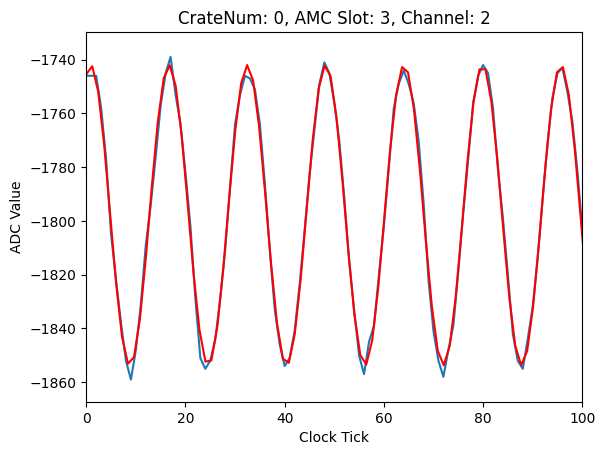

0.3976781363262528
0.3508509338724373


In [11]:
reload(plotting_utils)
# Loop over the tree
for entry in tree:
    fitResults = entry.RFFitter_RFfitResults
    for fitResult in fitResults:
        fig, ax = plt.subplots()
        plotting_utils.plot_rf_fit(ax,fitResult)
        ax.set_xlim(0,100)
        plt.show()
        print(fitResult.frequency)  # Frequency in Hz
        print(fitResult.phase)  # Convert phase from radians to degrees
        break
    break
        # print(fitResult.fitFunc.GetParameter(0))
        # # print(fitResult.waveform.GetObject().channelTag)
        # # Process waveform data as needed

In [12]:
# # Loop over the tree
# for entry in tree:
#     fit_results = entry.xtalFitter_FitResults
#     for result in fit_results:
#         print(result)
#         # Process fit result data as needed

0


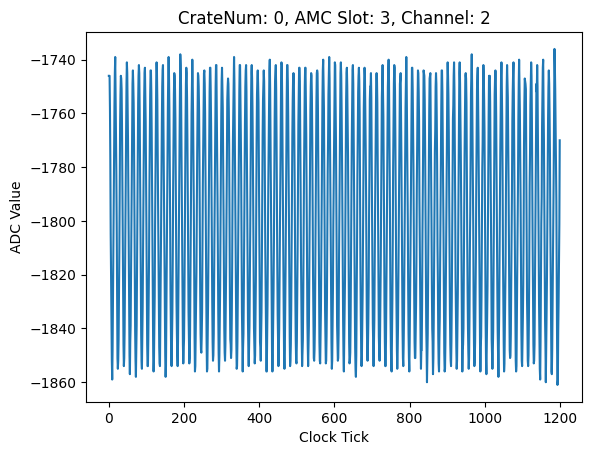

In [13]:
# Loop over the tree
for entry in tree:
    waveforms = entry.grouped_waveformsRF
    for waveform in waveforms:
        print(waveform.raw.GetObject().crateNum)
        fig, ax = plt.subplots()
        plotting_utils.plot_waveform(ax, waveform)
        plt.show()
    break
        

In [14]:
waveform = entry.grouped_waveformsRF[0]

In [15]:
# Fit waveform to a function
waveform